# Rendimiento Relativo
---

In [1]:
%load_ext autoreload
%autoreload 2
# import modules

from relper import indicators

import pandas as pd 
import numpy as np
import yfinance as yf

import os
from datetime import date
from datetime import datetime

In [2]:
folderPath_rsrc = '/relper/Resources/'
folderPath_results = '/relper/Results/'
cwd = os.getcwd()
path_rsrc = cwd + folderPath_rsrc
path_results = cwd + folderPath_results
# read data
ETFs = pd.read_excel(path_rsrc + "ETFs list.xlsx")

In [3]:
ETFs

,Technology,Energy,Telecom,Consumer Discretionary,Real Estate,Industrials,Utilities,Materials,Healthcare,Consumer Staples,Financials
0,AAPB,ACES,FCOM,AMZD,BBRE,AIRR,BLLD,ALUM,AGNG,CHIS,BDCX
1,AAPD,AMJ,IXP,AMZU,BLDG,AQWA,CHIU,BATT,ARKG,CLIX,BDCZ
2,AAPU,AMLP,IYZ,BAD,BYRE,ARKX,ECLN,CHIM,BBC,EATV,BIZD
3,AIQ,AMNA,LTL,BEDZ,CHIR,AWAY,EMIF,CIRC,BBH,EATZ,BNKD
4,ARKK,AMND,NXTG,BETZ,DFGR,BDRY,FUTY,COPX,BBP,ECON,BNKU
...,...,...,...,...,...,...,...,...,...,...,...
163,XPND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,XSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,XSW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,XT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
sector = "Energy"
energy = ETFs[sector]
energy.dropna(inplace=True)
energy = energy.to_list()

## Descargar datos

In [5]:
energy[:5]

['ACES', 'AMJ', 'AMLP', 'AMNA', 'AMND']

In [6]:
# Descargar data diaria
end_ = date.today()  # yyyy-mm-dd
meses_atras = 5  # 3 is fine due we need at least 50 cnadles data.
if end_.day == 31:
    start_ = datetime(end_.year, end_.month - meses_atras, 30)
else:
    start_ = datetime(end_.year, end_.month - meses_atras, end_.day)

data = yf.download(energy, start=start_, end=end_, interval="1d")

[*********************100%%**********************]  86 of 86 completed


4 Failed downloads:
['VMAT', 'RNWZ', 'MLPO', 'EINC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-06-29 00:00:00 -> 2023-11-29)')


In [7]:
close_df = data['Close']

In [8]:
close_df.tail()

,ACES,AMJ,AMLP,AMNA,AMND,AMTR,AMUB,AMZA,ATMP,BNE,...,TPYP,UMI,USAI,VCLN,VDE,VMAT,WNDY,XES,XLE,XOP
Date,,,,,,,,,,,,,,,,,,,,,
2023-11-21 00:00:00,30.610001,25.620001,42.750000,38.483002,40.040001,52.019001,16.149000,35.900002,21.740000,21.105000,...,25.549999,36.465000,28.552999,16.674999,118.620003,NaN,12.82,83.760002,84.620003,138.630005
2023-11-22 00:00:00,30.530001,25.730000,43.029999,38.644001,40.209999,52.236000,16.219000,35.980000,21.799999,21.141001,...,25.728001,36.599998,28.532000,16.760000,118.529999,NaN,12.69,83.540001,84.580002,138.699997
2023-11-24 00:00:00,30.610001,25.809999,43.200001,38.839001,40.397999,52.502998,16.271999,36.430000,21.889999,21.195999,...,25.840000,36.353001,28.723000,16.719999,119.129997,NaN,12.60,84.480003,84.930000,139.330002
2023-11-27 00:00:00,30.129999,25.770000,43.049999,38.716999,40.270000,52.353001,16.261999,36.269001,21.850000,21.004000,...,25.760000,36.233002,28.621000,16.709000,118.559998,NaN,12.57,83.639999,84.629997,138.130005
2023-11-28 00:00:00,30.910000,25.330000,43.029999,38.751999,40.289001,52.376999,15.940000,36.160000,21.520000,21.150000,...,25.799999,36.313000,28.600000,16.851999,118.550003,NaN,12.72,83.279999,84.650002,137.750000


## 1. Last 50 days mean
---

### i. Calculate SMA (50 days)

In [9]:
days = 50
sma = indicators._sma(close_df, period=days)

In [10]:
sma

,ACES,AMJ,AMLP,AMNA,AMND,AMTR,AMUB,AMZA,ATMP,BNE,...,TPYP,UMI,USAI,VCLN,VDE,VMAT,WNDY,XES,XLE,XOP
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-21,33.51718,24.8152,42.1488,37.57236,39.06052,50.44938,15.62402,34.91740,21.0776,21.38230,...,24.87164,35.49052,27.62100,16.55984,123.2400,NaN,12.45954,91.2188,87.7856,144.785799
2023-11-22,33.32038,24.8472,42.1786,37.58808,39.08096,50.48628,15.64462,34.94240,21.0974,21.33582,...,24.88000,35.51672,27.63620,16.53346,123.0306,NaN,12.45014,90.9362,87.6316,144.519199
2023-11-24,33.09738,24.8774,42.2066,37.59706,39.09558,50.51416,15.66392,34.97140,21.1158,21.28224,...,24.88370,35.52940,27.64796,16.49744,122.8028,NaN,12.43434,90.6404,87.4630,144.250199


### ii. Price porcentual deviation from 50 days mean

In [11]:
pm = indicators._PM(prices_df=close_df, sma_df=sma)

In [12]:
pm

,ACES,AMJ,AMLP,AMNA,AMND,AMTR,AMUB,AMZA,ATMP,BNE,...,TPYP,UMI,USAI,VCLN,VDE,VMAT,WNDY,XES,XLE,XOP
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-21,-0.086737,0.032432,0.014264,0.024237,0.025076,0.031113,0.033601,0.028141,0.031427,-0.012969,...,0.027274,0.027457,0.033742,0.006954,-0.037488,NaN,0.028930,-0.081768,-0.036061,-0.042517
2023-11-22,-0.083744,0.035529,0.020186,0.028092,0.028890,0.034657,0.036714,0.029695,0.033303,-0.009131,...,0.034084,0.030501,0.032414,0.013702,-0.036581,NaN,0.019266,-0.081334,-0.034823,-0.040266
2023-11-24,-0.075153,0.037488,0.023537,0.033033,0.033314,0.039372,0.038820,0.041708,0.036664,-0.004052,...,0.038431,0.023181,0.038883,0.013491,-0.029908,NaN,0.013323,-0.067965,-0.028961,-0.034109


## 2. Overbought and Oversold
---

### i. Relative Strenght Index (RSI)

In [13]:
days_ = 14
# https://www.macroption.com/rsi-calculation/

In [14]:
def _rsi(data, periods=14):
    """
    data: pandas DataFrame
        Close prices.
    """
    change = data.diff()
    # gain = [i if i>=0 else 0.0 for i in change]
    # loss = [i if i<0 else 0.0 for i in change]
    
    gain = change.apply(lambda x: x if x>=0 else 0.0)
    loss = change.apply(lambda x: -x if x<0 else 0.0)
    
    avgGain = gain.ewm(span=periods, min_periods=periods).mean()
    avgLoss = loss.ewm(span=periods, min_periods=periods).mean()
    
    rs = avgGain / avgLoss
    rsi = 100 - (100/(rs + 1))
    
    return rsi

In [15]:
rsi = _rsi(close_df["AMJ"])
rsi

Date
2023-06-29          NaN
2023-06-30          NaN
2023-07-03          NaN
2023-07-05          NaN
2023-07-06          NaN
                ...    
2023-11-21    61.874738
2023-11-22    64.999568
2023-11-24    67.251984
2023-11-27    64.844540
2023-11-28    44.586217
Name: AMJ, Length: 106, dtype: float64

NameError: name 'plt' is not defined

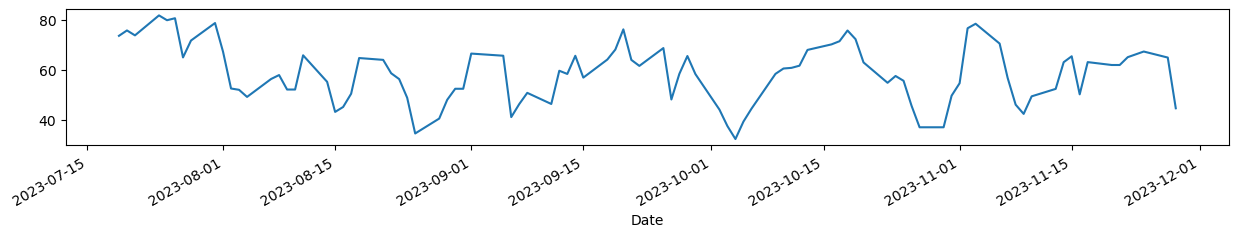

In [16]:
rsi.plot(figsize=(15,2))
plt.axhline(y=30, linestyle='--', color='grey')
plt.axhline(y=70, linestyle='--', color='grey')

In [ ]:
close_df["AMJ"].plot(figsize=(15,5))

### ii. Bollinger Bands

In [ ]:
test = indicators._bollinger_bands(close_df['AMJ'])
test

In [ ]:
test[['sma', 'Upper Band', 'Lower Band']].plot()